### Linear Regression - Manual Implementation

Constants used in this example:
- `LEARNING_RATE` - 0.5
- `MAX_ITERATION` - 10000
- `MAX_COST_DIFF` - 1e-10

In [365]:
# Install requirements
# %pip install matplotlib

In [366]:
import os
import matplotlib.pyplot as plt

`normalize()` &nbsp; Returns a list of normalized column (z-standardization)
<br><br>
`linspace()` &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Alternative to `numpy.linspace()`
<br><br>
`read_csv()` &nbsp;&nbsp;&nbsp;&nbsp; Returns a tuple containing `X` and `Y` column

In [367]:
def normalize(array):
    # z-standardization
    mean = sum(array) / len(array)
    sum_of_squares = sum((i - mean) ** 2 for i in array)
    standard_deviation = (sum_of_squares  / len(array)) ** 2

    return [(i - mean) / standard_deviation for i in array]

def linspace(start = 0, end = 25, total = 25):
    step_size = (end - start) / total
    array = [start]

    for _ in range(total):
        array.append(array[-1] + step_size)
    
    return array

def read_csv(file1, file2):
    if not os.path.exists(file1):
        raise FileNotFoundError(f"{file1}: File not found")
    

    if not os.path.exists(file2):
        raise FileNotFoundError(f"{file2}: File not found")
    
    x = []
    y = []
    with open(file1) as x_dataset, open(file2) as y_dataset:
        for x_data, y_data in zip(x_dataset, y_dataset):
            x.append(float(x_data.strip()))
            y.append(float(y_data.strip()))
    
    return x, y

In [368]:
LEARNING_RATE = 0.5
MAX_ITERATION = 1000
MIN_COST_DIFF = 1e-10

Read `X` and `Y` column from `./datasets/linearX.csv` and `./datasets/linearY.csv` respectively

In [369]:
x, y = read_csv("./datasets/linearX.csv", "./datasets/linearY.csv")

iteration = 0

x = normalize(x)

theta_0 = theta_1 = 0
feature_count = len(x)
cost_arr = [float("inf")]

Actual implementation of Linear Regression

In [370]:
while True:
    iteration += 1

    sum_0 = sum_1 = sum_3 = 0

    for i in range(feature_count):
        actual = y[i]
        predicted = theta_0 + theta_1 * x[i]

        error = predicted - actual

        sum_0 += error
        sum_1 += error * x[i]
    
    grad_0 = sum_0 / feature_count
    grad_1 = sum_1 / feature_count

    theta_0 -= grad_0 * LEARNING_RATE
    theta_1 -= grad_1 * LEARNING_RATE

    for i in range(feature_count):
        actual = y[i]
        predicted = theta_0 + theta_1 * x[i]

        sum_3 += (predicted - actual) ** 2
    
    recent_cost = sum_3 / (2 * feature_count)
    cost_arr.append(recent_cost)

    if iteration >= MAX_ITERATION or abs(cost_arr[-1] - cost_arr[-2]) <= MIN_COST_DIFF:
        break

In [371]:
print(
f"""
    Theta 0  : {round(theta_0, 3)}
    Theta 1  : {round(theta_1, 3)}
    Error    : {round(cost_arr[-1], 10)}
    Equation : y(x) = {round(theta_1, 3)}x + {round(theta_0, 3)}
""")


    Theta 0  : 0.997
    Theta 1  : 0.006
    Error    : 1.1972e-06
    Equation : y(x) = 0.006x + 0.997



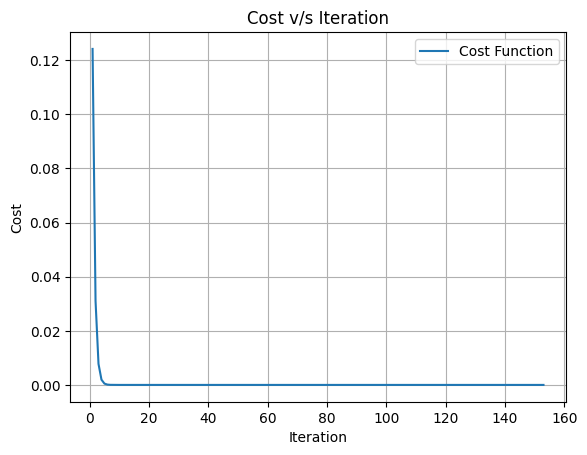

In [372]:
plt.grid()
plt.title("Cost v/s Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(range(len(cost_arr)), cost_arr, label="Cost Function")
plt.legend()
plt.show()

In [373]:
x_line = linspace(-0.5, 1, 100)
y_line = [theta_1 * x + theta_0 for x in x_line]

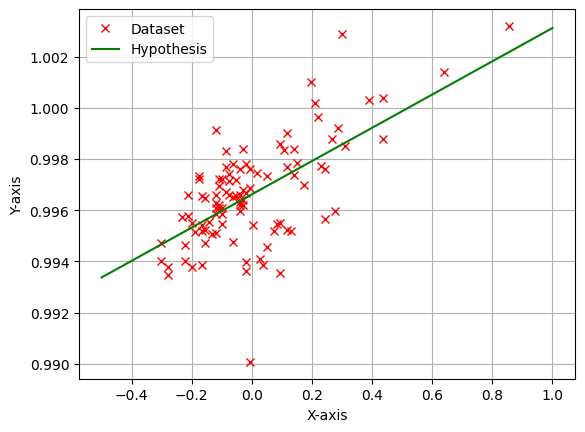

In [374]:
plt.grid()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.plot(x, y, 'rx', label="Dataset")
plt.plot(x_line, y_line, label="Hypothesis", color="green")
plt.legend()
plt.show()